In [1]:
import torch

In [4]:
#0계 텐서(스칼라)
# float()을 호출해서 강제로 float32로 변환. 안그러면 nn.Linear같은 부분에서 에러 발생
r0 = torch.tensor(1.0).float()

# type 확인
print(type(r0))

# dtype 확인
print(r0.dtype)

<class 'torch.Tensor'>
torch.float32


In [5]:
# shape 확인. 0계 텐서이기 때문에 내부가 비어있음
print(r0.shape)

# 데이터 확인
print(r0.data)

torch.Size([])
tensor(1.)


In [6]:
import numpy as np

# 1계 텐서(벡터)
# 1계 넘파이 변수 작성
r1_np = np.array([1,2,3,4,5])
print(r1_np.shape)

# 넘파이에서 텐서로 변환
r1 = torch.tensor(r1_np).float()

# dtype 확인
print(r1.dtype)

# shape 확인
print(r1.shape)

# 데이터 확인
print(r1.data)

(5,)
torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


In [8]:
# 2계 텐서(행렬)

# 2계 넘파이 변수 작성
r2_np = np.array([[1,5,6], [4,3,2]])
print(r2_np.shape) # (2,3)

# 넘파이에서 텐서로 변환
r2 = torch.tensor(r2_np).float()

# shape 확인
print(r2.shape) # torch.Size([2,3])

# 데이터 확인
print(r2.data) # tensor([[1., 5., 6.]
              #          [4., 3., 2.]])

(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [10]:
# 3계 텐서

# 난수 seed 초기화
torch.manual_seed(123)

# shape=[3,2,2]의 정규표본 텐서 작성
r3 = torch.randn((3,2,2))

# shape 확인
print(r3.shape) # torch.Size([3,2,2])

# 데이터 확인
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [11]:
# 4계 텐서

# 요소가 모두 1인 shape=[2,3,2,2] 텐서 작성
r4 = torch.ones((2,3,2,2))

# shape 확인
print(r4.shape)

# 데이터 확인
print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


In [12]:
# 정수형 텐서로 변환
r5 = r1.long()

# dtype
print(r5.dtype)

print(r5)

torch.int64
tensor([1, 2, 3, 4, 5])


In [13]:
# view함수 - 계수 변환

# 2계화
# 요소 수를 -1로 지정하면 이 수를 자동으로 조정함
r6 = r3.view(3, -1)

print(r6.shape)

print(r6.data)

torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


In [14]:
# 1계화(1차원, 벡터)
# 남은 자리에 -1을 지정하면 이 수를 자동으로 조정함
r7 = r3.view(-1)

print(r7.shape)

print(r7.data)

torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


In [15]:
# 스칼라 텐서(0계 텐서)는 item 함수로 값을 꺼낼 수 있음
item = r0.item()

print(type(item))
print(item)

<class 'float'>
1.0


In [16]:
# 스칼라 이외의 텐서에 item 함수는 무효함
print(r1.item())

RuntimeError: a Tensor with 5 elements cannot be converted to Scalar

In [17]:
# 요소가 한 개밖에 없는 1계 텐서는 OK
# 2계 이상에서도 요소가 한 개 밖 없으면 OK
t1 = torch.ones(1)

print(t1.shape)

print(t1.item())

torch.Size([1])
1.0


In [18]:
print(r2)

# max 함수를 인수 없이 호출하면, 최댓값을 얻음
print(r2.max())

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)


In [20]:
# torch.max 함수
# 두번째 인수는 기준이 되는 축을 의미
# 1=>행, 0=>열
print(torch.max(r2, 1))

torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))


In [21]:
# 최대값이 위치하는 index 가져오기
print(torch.max(r2, 1)[1])

tensor([2, 0])


In [22]:
# 텐서를 넘파이로 변환
r2_np = r2.data.numpy()

print(type(r2_np))

print(r2_np)

<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


# 2차 함수의 경사 계산

In [26]:
# 넘파이로 [-2,2] 구간을 0.25 간격으로 나눈 값 저장
x_np = np.arange(-2, 2.1, 0.25)

print(x_np)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [27]:
# 경사 계산용 변수 정의
# 넘파이로 정의한 x_np를 텐서 x로 변환

# requires_grad = True로 설정
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)

print(x)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


In [28]:
# 2차 함수의 계산
# 계산 그래프는 내부에서 자동 생성됨

y = 2 * x**2 + 2

print(y)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


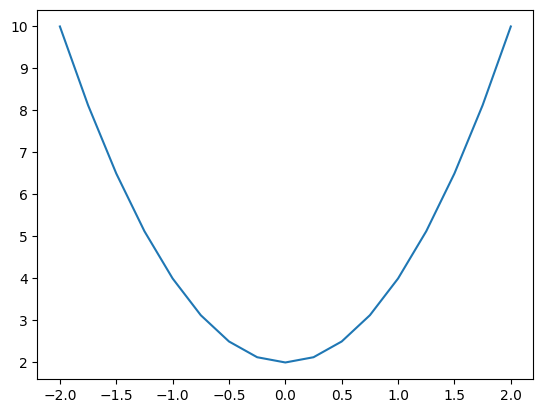

In [29]:
import matplotlib.pyplot as plt

plt.plot(x.data, y.data)
plt.show()

In [30]:
# 경사 계산을 위해 최종 값은 스칼라일 필요가 있으므로, 더미로 sum 함수를 붙임

z = y.sum()

print(z)

tensor(85., grad_fn=<SumBackward0>)


In [31]:
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

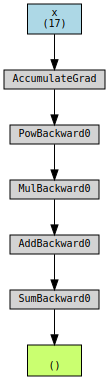

In [32]:
# 계산 그래프 시각화
from torchviz import make_dot

# 시각화 함수 호출
g = make_dot(z, params={'x': x})
display(g)

In [33]:
# 경사 계산
z.backward()

In [34]:
# 경삿값 가져오기
print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


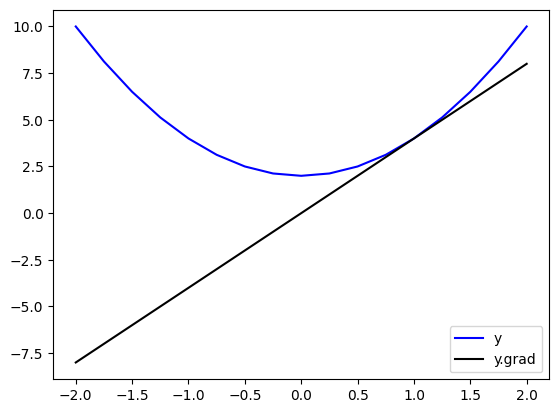

In [35]:
# 원래 함수와 경사 그래프

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

In [37]:
# 경사를 초기화하지 않고 두번째 경사를 계산
y = 2 * x**2 + 2
z = y.sum()
z.backward()

# x의 경사 확인
print(x.grad)

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])


In [38]:
# 경삿값 초기화
x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


# 시그모이드 함수의 경사 계산

In [39]:
# 시그모이드 함수 정의
sigmoid = torch.nn.Sigmoid()

In [40]:
# y값 계산
y = sigmoid(x)

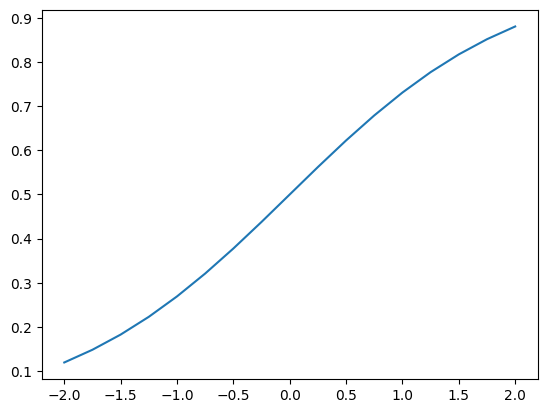

In [41]:
# 그래프 출력
plt.plot(x.data, y.data)
plt.show()

In [42]:
# 경사 계산을 위해 최종 값은 스칼라일 필요가 있으므로, 더미로 sum 함수를 붙임
z = y.sum()

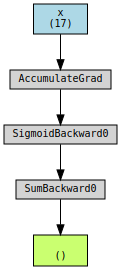

In [43]:
# 계산 그래프 시각화
g = make_dot(z, params={'x': x})
display(g)

In [44]:
# 경사 계산
z.backward()

# 경삿값 확인
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


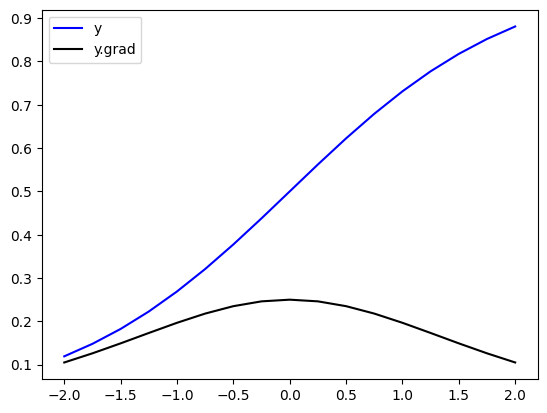

In [45]:
# 시그모이드 함수와 경사 그래프
plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()